<a href="https://colab.research.google.com/github/sitiameliarahmi/Analitikadata/blob/main/3333210063_Siti_Amelia_Rahmi_Kelas_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [29]:
!gdown --id 1HI1mj0oGTDCN6D5iCnW3bVpEeoQUBTSs

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HI1mj0oGTDCN6D5iCnW3bVpEeoQUBTSs
To: /content/covid_jpn_total[1].csv
100% 251k/251k [00:00<00:00, 98.6MB/s]


In [30]:
import pandas as pd
dataset = pd.read_csv('covid_jpn_total[1].csv')
dataset

,Date,Location,Positive,Tested,Symptomatic,Asymptomatic,Sym-unknown,Hosp_require,Hosp_mild,Hosp_severe,Hosp_unknown,Hosp_waiting,Discharged,Fatal,Vaccinated_1st,Vaccinated_2nd,Vaccinated_3rd,Vaccinated_4th,Vaccinated_5th
0,2020-02-06,Domestic,16,132.0,16.0,0.0,0.0,NaN,9.0,0,3.0,0.0,4.0,0,NaN,NaN,NaN,NaN,NaN
1,2020-02-06,Returnee,9,566.0,5.0,4.0,0.0,NaN,3.0,0,2.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
2,2020-02-07,Domestic,16,151.0,16.0,0.0,0.0,NaN,12.0,0,0.0,0.0,4.0,0,NaN,NaN,NaN,NaN,NaN
3,2020-02-07,Returnee,9,566.0,6.0,3.0,0.0,NaN,4.0,0,2.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
4,2020-02-10,Domestic,16,174.0,16.0,0.0,0.0,NaN,7.0,0,0.0,0.0,9.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,2023-05-06,Airport,24143,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,8,0.0,0.0,0.0,NaN,NaN
3519,2023-05-06,Returnee,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,NaN,NaN
3520,2023-05-07,Domestic,33793429,NaN,NaN,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,74654,0.0,0.0,0.0,NaN,NaN
3521,2023-05-07,Airport,24147,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,8,0.0,0.0,0.0,NaN,NaN


## 2. Exploratory Data

In [31]:
dataset.shape

(3523, 19)

In [32]:
dataset.columns

Index(['Date', 'Location', 'Positive', 'Tested', 'Symptomatic', 'Asymptomatic',
       'Sym-unknown', 'Hosp_require', 'Hosp_mild', 'Hosp_severe',
       'Hosp_unknown', 'Hosp_waiting', 'Discharged', 'Fatal', 'Vaccinated_1st',
       'Vaccinated_2nd', 'Vaccinated_3rd', 'Vaccinated_4th', 'Vaccinated_5th'],
      dtype='object')

In [33]:
dataset.dtypes

Date               object
Location           object
Positive            int64
Tested            float64
Symptomatic       float64
Asymptomatic      float64
Sym-unknown       float64
Hosp_require      float64
Hosp_mild         float64
Hosp_severe         int64
Hosp_unknown      float64
Hosp_waiting      float64
Discharged        float64
Fatal               int64
Vaccinated_1st    float64
Vaccinated_2nd    float64
Vaccinated_3rd    float64
Vaccinated_4th    float64
Vaccinated_5th    float64
dtype: object

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3523 non-null   object 
 1   Location        3523 non-null   object 
 2   Positive        3523 non-null   int64  
 3   Tested          2838 non-null   float64
 4   Symptomatic     241 non-null    float64
 5   Asymptomatic    241 non-null    float64
 6   Sym-unknown     241 non-null    float64
 7   Hosp_require    2613 non-null   float64
 8   Hosp_mild       241 non-null    float64
 9   Hosp_severe     3523 non-null   int64  
 10  Hosp_unknown    241 non-null    float64
 11  Hosp_waiting    241 non-null    float64
 12  Discharged      2854 non-null   float64
 13  Fatal           3523 non-null   int64  
 14  Vaccinated_1st  2430 non-null   float64
 15  Vaccinated_2nd  2430 non-null   float64
 16  Vaccinated_3rd  2430 non-null   float64
 17  Vaccinated_4th  750 non-null    f

In [35]:
dataset.nunique()

Date              1182
Location             3
Positive          2284
Tested            1877
Symptomatic        102
Asymptomatic        99
Sym-unknown         52
Hosp_require      1254
Hosp_mild          120
Hosp_severe        665
Hosp_unknown        75
Hosp_waiting        45
Discharged        1685
Fatal             1124
Vaccinated_1st     787
Vaccinated_2nd     766
Vaccinated_3rd     343
Vaccinated_4th     230
Vaccinated_5th     137
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [36]:
dataset.isnull().sum()

Date                 0
Location             0
Positive             0
Tested             685
Symptomatic       3282
Asymptomatic      3282
Sym-unknown       3282
Hosp_require       910
Hosp_mild         3282
Hosp_severe          0
Hosp_unknown      3282
Hosp_waiting      3282
Discharged         669
Fatal                0
Vaccinated_1st    1093
Vaccinated_2nd    1093
Vaccinated_3rd    1093
Vaccinated_4th    2773
Vaccinated_5th    2773
dtype: int64

In [37]:
dataset['Tested'].dtypes

dtype('float64')

In [38]:
dataset['Symptomatic'].dtypes

dtype('float64')

In [39]:
dataset['Asymptomatic'].dtypes

dtype('float64')

In [40]:
dataset['Sym-unknown'].dtypes

dtype('float64')

In [41]:
dataset['Hosp_require'].dtypes

dtype('float64')

In [42]:
dataset['Hosp_unknown'].dtypes

dtype('float64')

In [43]:
dataset['Hosp_waiting'].dtypes

dtype('float64')

In [44]:
dataset['Discharged'].dtypes

dtype('float64')

In [45]:
dataset['Vaccinated_1st'].dtypes

dtype('float64')

In [46]:
dataset['Vaccinated_2nd'].dtypes

dtype('float64')

In [47]:
dataset['Vaccinated_3rd'].dtypes

dtype('float64')

In [48]:
dataset['Vaccinated_4th'].dtypes

dtype('float64')

In [49]:
dataset['Vaccinated_5th'].dtypes

dtype('float64')

Perform imputer to handle missing value in numerical data

In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [53]:
imputer = imputer.fit(dataset[['Tested', 'Symptomatic', 'Asymptomatic', 'Sym-unknown', 'Hosp_require', 'Hosp_unknown', 'Hosp_waiting', 'Discharged', 'Vaccinated_1st', 'Vaccinated_2nd', 'Vaccinated_3rd', 'Vaccinated_4th', 'Vaccinated_5th']])
imputer

SimpleImputer()

In [54]:
dataset[['Tested', 'Symptomatic', 'Asymptomatic', 'Sym-unknown', 'Hosp_require', 'Hosp_unknown', 'Hosp_waiting', 'Discharged', 'Vaccinated_1st', 'Vaccinated_2nd', 'Vaccinated_3rd', 'Vaccinated_4th', 'Vaccinated_5th']] = imputer.transform(dataset[['Tested', 'Symptomatic', 'Asymptomatic', 'Sym-unknown', 'Hosp_require', 'Hosp_unknown', 'Hosp_waiting', 'Discharged', 'Vaccinated_1st', 'Vaccinated_2nd', 'Vaccinated_3rd', 'Vaccinated_4th', 'Vaccinated_5th']])
dataset.isnull().sum()

Date                 0
Location             0
Positive             0
Tested               0
Symptomatic          0
Asymptomatic         0
Sym-unknown          0
Hosp_require         0
Hosp_mild         3282
Hosp_severe          0
Hosp_unknown         0
Hosp_waiting         0
Discharged           0
Fatal                0
Vaccinated_1st       0
Vaccinated_2nd       0
Vaccinated_3rd       0
Vaccinated_4th       0
Vaccinated_5th       0
dtype: int64

Using drop column tohandle missing value on categorical or object data

In [55]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Date              0
Location          0
Positive          0
Tested            0
Symptomatic       0
Asymptomatic      0
Sym-unknown       0
Hosp_require      0
Hosp_severe       0
Hosp_unknown      0
Hosp_waiting      0
Discharged        0
Fatal             0
Vaccinated_1st    0
Vaccinated_2nd    0
Vaccinated_3rd    0
Vaccinated_4th    0
Vaccinated_5th    0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [56]:
dataset.describe()

,Positive,Tested,Symptomatic,Asymptomatic,Sym-unknown,Hosp_require,Hosp_severe,Hosp_unknown,Hosp_waiting,Discharged,Fatal,Vaccinated_1st,Vaccinated_2nd,Vaccinated_3rd,Vaccinated_4th,Vaccinated_5th
count,3.523000e+03,3.523000e+03,3523.000000,3523.000000,3523.000000,3.523000e+03,3523.000000,3523.000000,3523.000000,3.523000e+03,3523.000000,3.523000e+03,3.523000e+03,3.523000e+03,3.523000e+03,3.523000e+03
mean,2.637654e+06,7.161219e+06,1040.331950,123.302905,480.369295,7.547138e+04,146.842464,112.904564,33.066390,9.109210e+05,7571.200114,2.751318e+07,2.616439e+07,1.376494e+07,1.699166e+07,5.488371e+06
std,7.499448e+06,1.368930e+07,616.559222,62.463884,333.807853,2.317859e+05,334.412575,55.088501,22.817057,2.569553e+06,16650.706651,3.686564e+07,3.587869e+07,2.483341e+07,1.083961e+07,5.023922e+06
min,0.000000e+00,1.320000e+02,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,8.290000e+02,1040.331950,123.302905,480.369295,2.900000e+01,0.000000,112.904564,33.066390,1.500000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.699166e+07,5.488371e+06
50%,3.601000e+03,1.189670e+06,1040.331950,123.302905,480.369295,1.402000e+03,0.000000,112.904564,33.066390,8.341000e+03,7.000000,2.751318e+07,1.982317e+07,0.000000e+00,1.699166e+07,5.488371e+06
75%,1.613750e+05,7.161219e+06,1040.331950,123.302905,480.369295,7.547138e+04,106.500000,112.904564,33.066390,9.109210e+05,2357.500000,2.751318e+07,2.616439e+07,1.376494e+07,1.699166e+07,5.488371e+06
max,3.379343e+07,7.365563e+07,9224.000000,1024.000000,5134.000000,1.993062e+06,2223.000000,692.000000,383.000000,2.029998e+07,74654.000000,1.047037e+08,1.033784e+08,8.648090e+07,5.854944e+07,3.056665e+07


<Axes: >

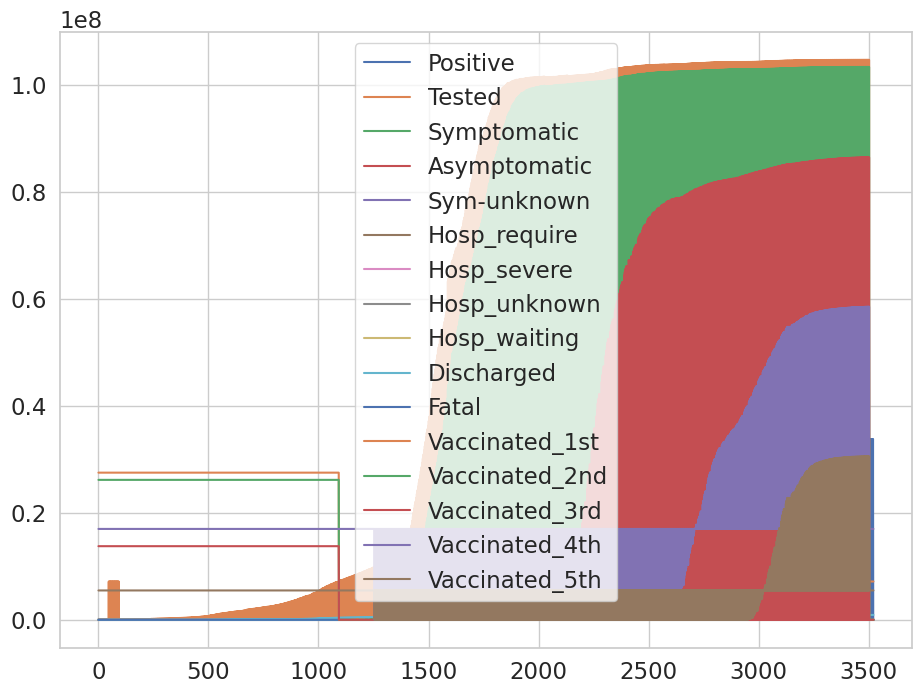

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

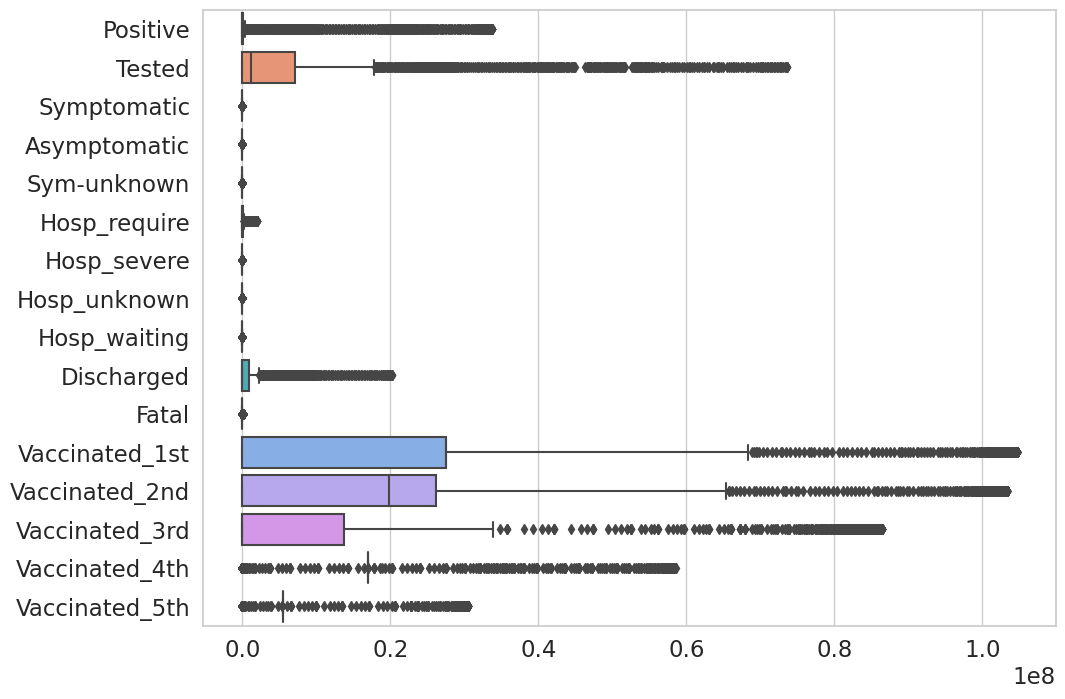

In [58]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

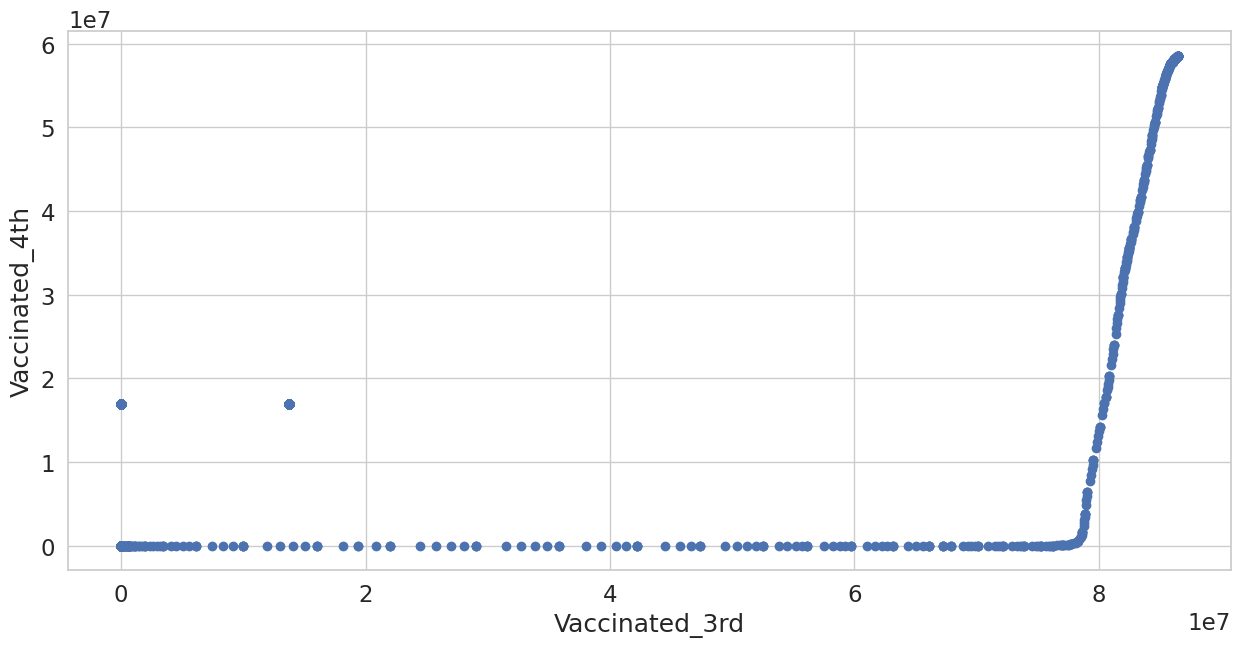

In [60]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Vaccinated_3rd'], dataset['Vaccinated_4th'])
 
# x-axis label
ax.set_xlabel('Vaccinated_3rd')
 
# y-axis label
ax.set_ylabel('Vaccinated_4th')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [61]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['Vaccinated_3rd'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Vaccinated_3rd'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (3523, 18)


In [62]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Vaccinated_3rd'] > upper].index
outliers_lower = dataset[dataset['Vaccinated_3rd'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (3105, 18)


<ipython-input-62-38949dae97a2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


In [63]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['Vaccinated_4th'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Vaccinated_4th'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (3105, 18)


In [64]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Vaccinated_4th'] > upper].index
outliers_lower = dataset[dataset['Vaccinated_4th'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (2773, 18)


<ipython-input-64-01dc58fe3b49>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


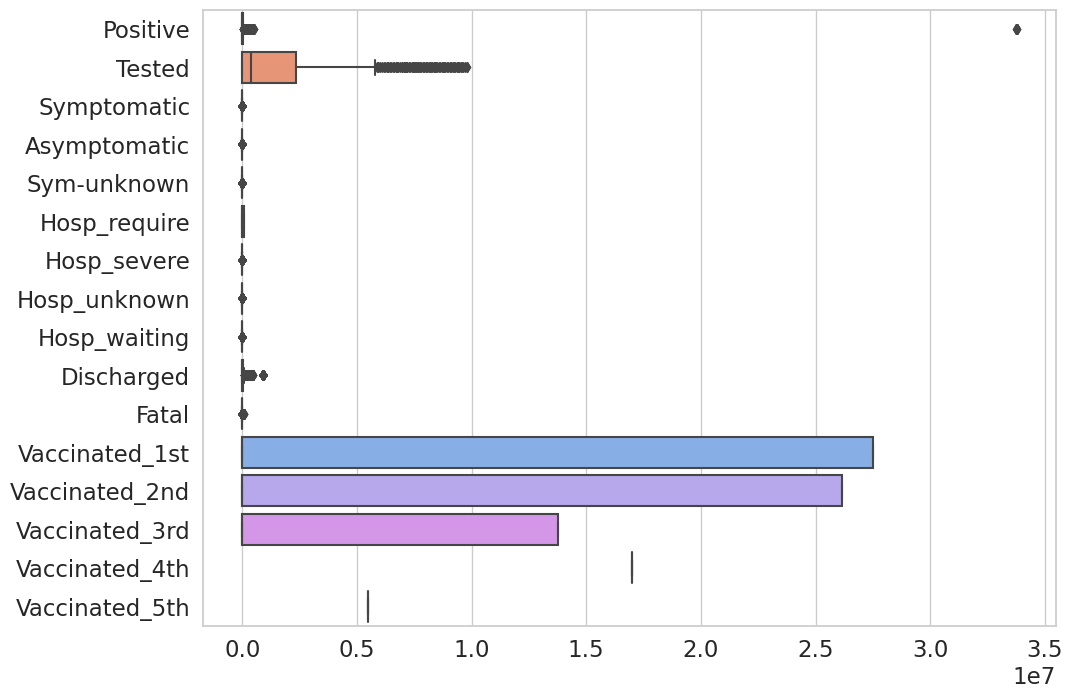

In [65]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

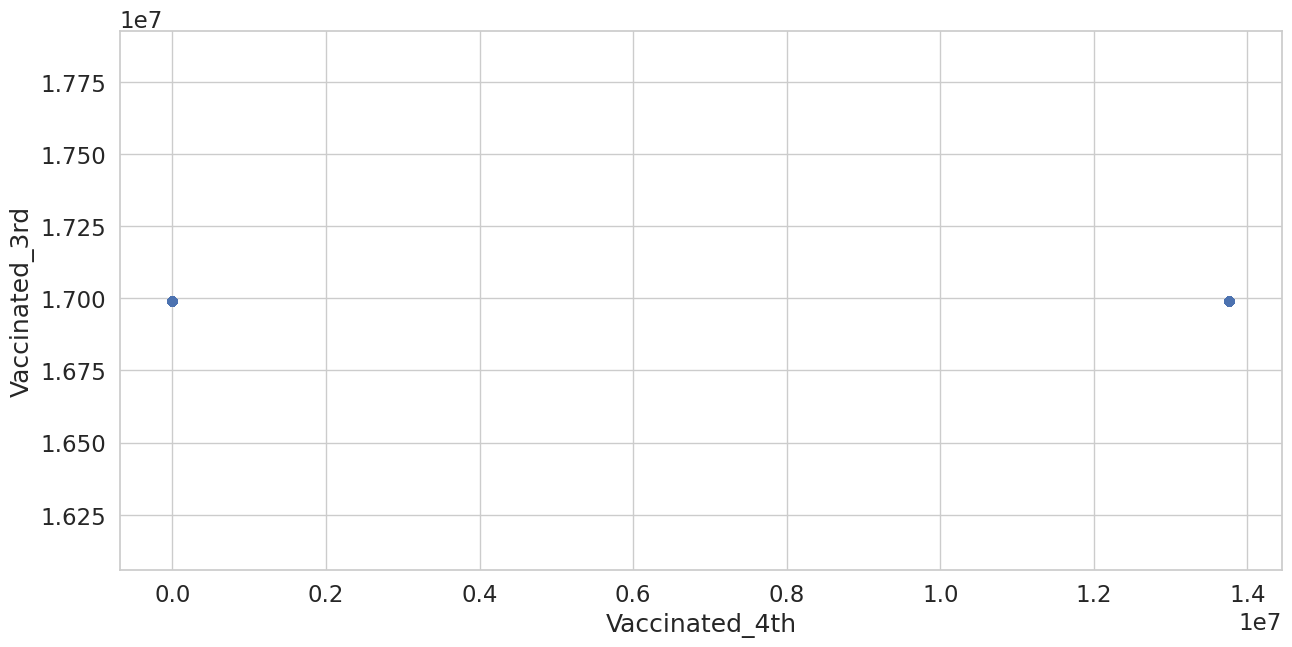

In [66]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Vaccinated_3rd'], dataset['Vaccinated_4th'])
 
# x-axis label
ax.set_xlabel('Vaccinated_4th')
 
# y-axis label
ax.set_ylabel('Vaccinated_3rd')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

LinAlgError: ignored

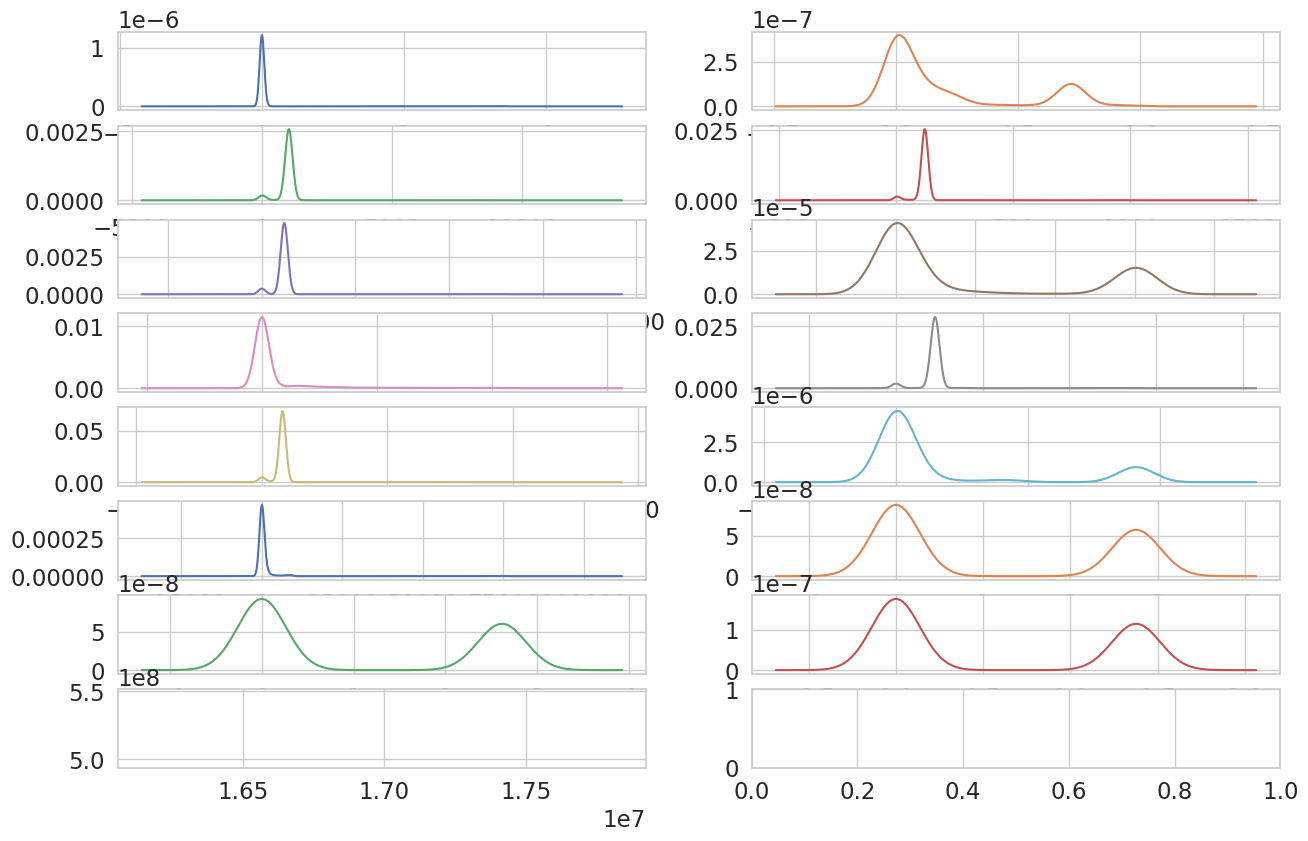

In [74]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

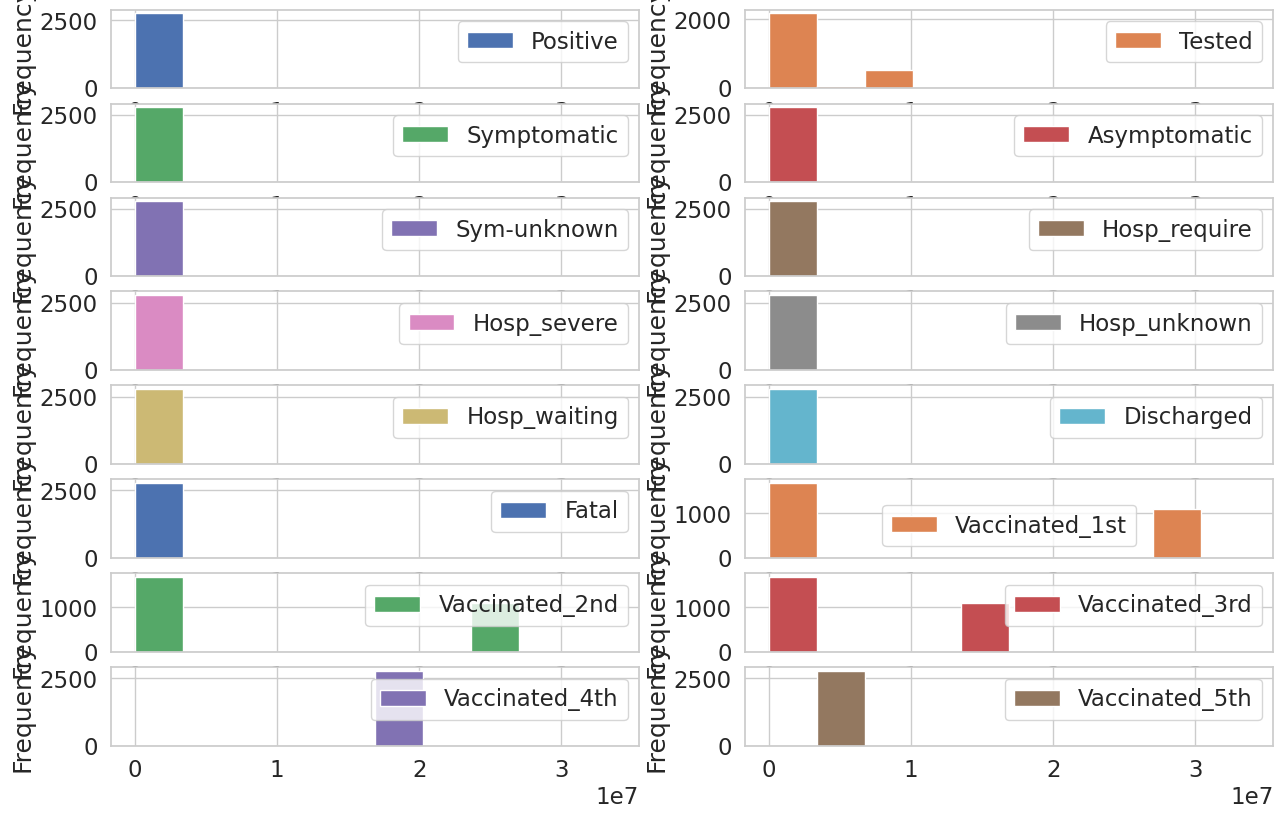

In [75]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

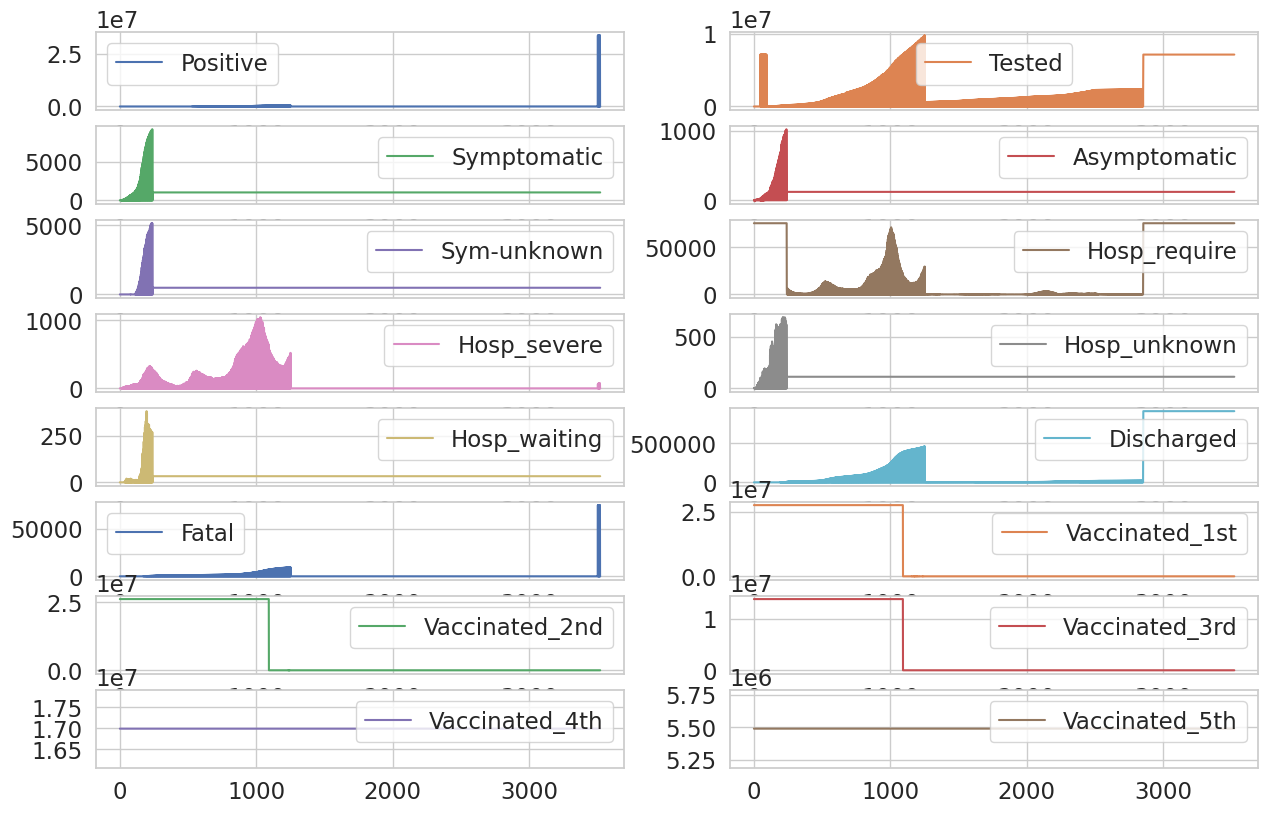

In [76]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


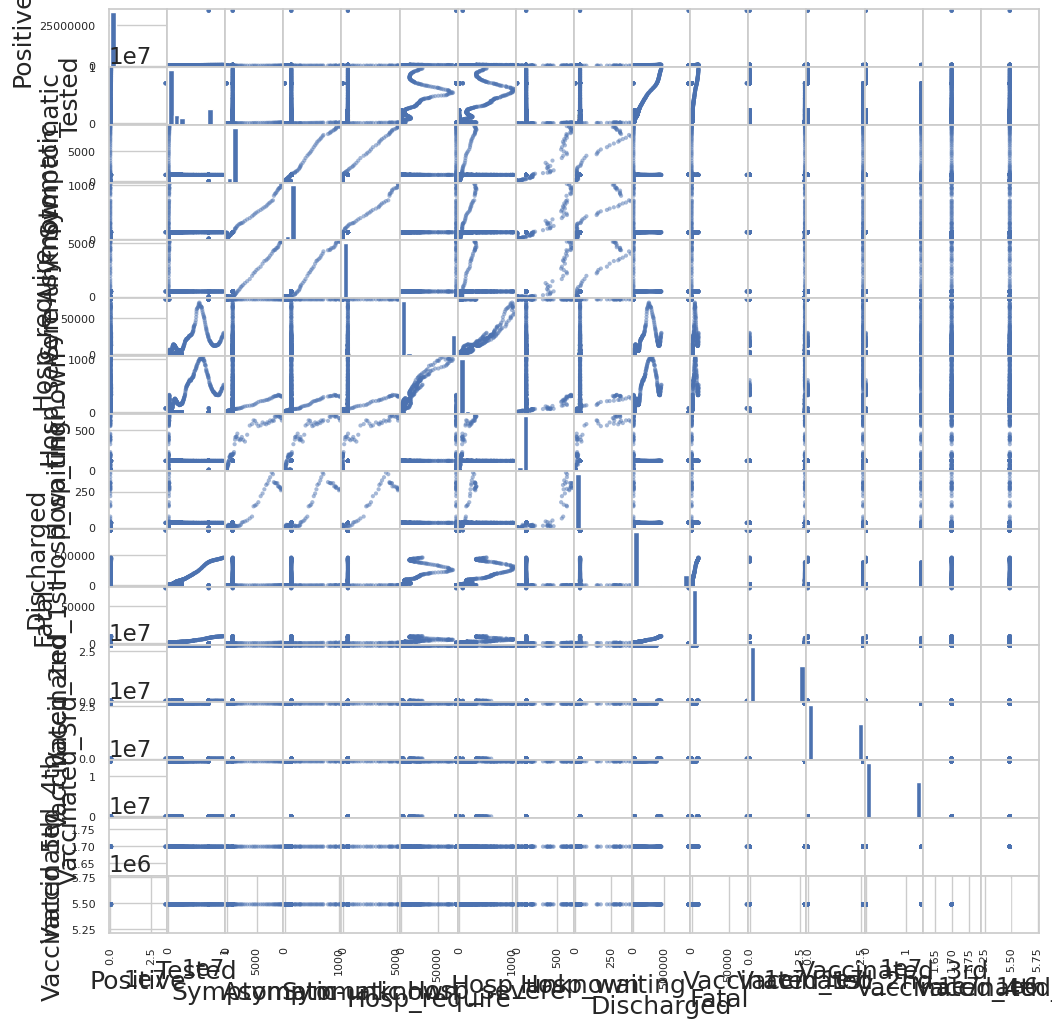

In [77]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

<ipython-input-78-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


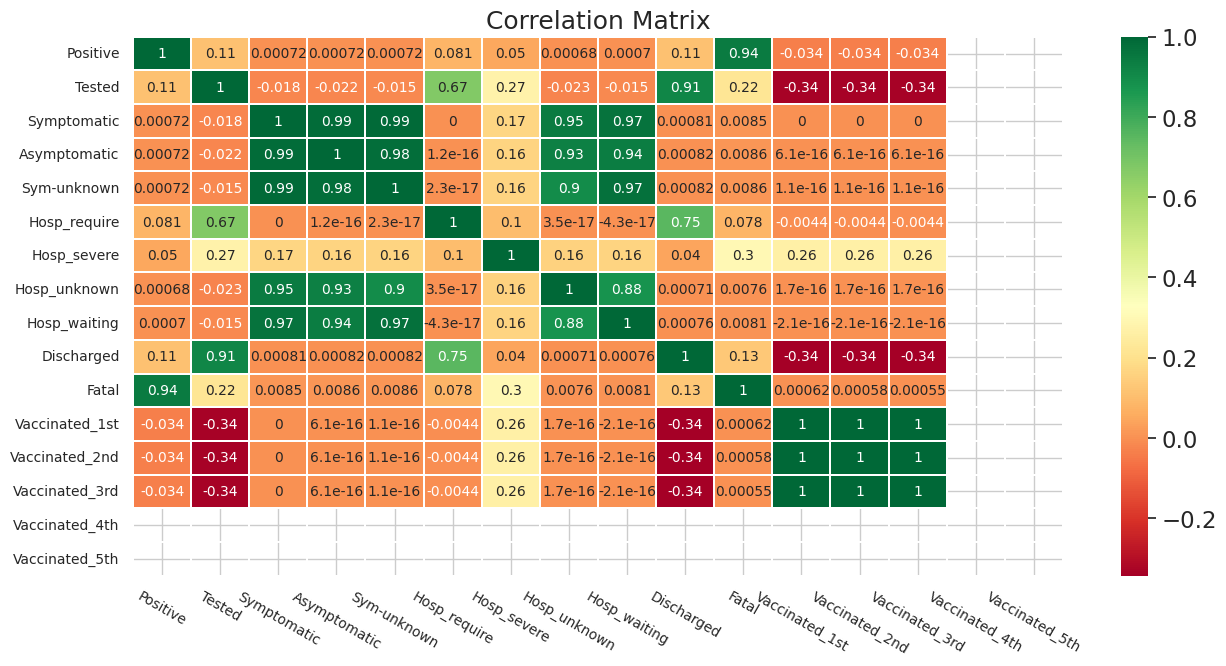

In [78]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [80]:
x = dataset.drop('Location', axis=1)
x

,Date,Positive,Tested,Symptomatic,Asymptomatic,Sym-unknown,Hosp_require,Hosp_severe,Hosp_unknown,Hosp_waiting,Discharged,Fatal,Vaccinated_1st,Vaccinated_2nd,Vaccinated_3rd,Vaccinated_4th,Vaccinated_5th
0,2020-02-06,16,1.320000e+02,16.00000,0.000000,0.000000,75471.384998,0,3.000000,0.00000,4.000000,0,2.751318e+07,2.616439e+07,1.376494e+07,1.699166e+07,5.488371e+06
1,2020-02-06,9,5.660000e+02,5.00000,4.000000,0.000000,75471.384998,0,2.000000,0.00000,0.000000,0,2.751318e+07,2.616439e+07,1.376494e+07,1.699166e+07,5.488371e+06
2,2020-02-07,16,1.510000e+02,16.00000,0.000000,0.000000,75471.384998,0,0.000000,0.00000,4.000000,0,2.751318e+07,2.616439e+07,1.376494e+07,1.699166e+07,5.488371e+06
3,2020-02-07,9,5.660000e+02,6.00000,3.000000,0.000000,75471.384998,0,2.000000,0.00000,0.000000,0,2.751318e+07,2.616439e+07,1.376494e+07,1.699166e+07,5.488371e+06
4,2020-02-10,16,1.740000e+02,16.00000,0.000000,0.000000,75471.384998,0,0.000000,0.00000,9.000000,0,2.751318e+07,2.616439e+07,1.376494e+07,1.699166e+07,5.488371e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,2023-05-06,24143,7.161219e+06,1040.33195,123.302905,480.369295,75471.384998,0,112.904564,33.06639,910921.037491,8,0.000000e+00,0.000000e+00,0.000000e+00,1.699166e+07,5.488371e+06
3519,2023-05-06,0,7.161219e+06,1040.33195,123.302905,480.369295,75471.384998,0,112.904564,33.06639,910921.037491,0,0.000000e+00,0.000000e+00,0.000000e+00,1.699166e+07,5.488371e+06
3520,2023-05-07,33793429,7.161219e+06,1040.33195,123.302905,480.369295,75471.384998,74,112.904564,33.06639,910921.037491,74654,0.000000e+00,0.000000e+00,0.000000e+00,1.699166e+07,5.488371e+06
3521,2023-05-07,24147,7.161219e+06,1040.33195,123.302905,480.369295,75471.384998,0,112.904564,33.06639,910921.037491,8,0.000000e+00,0.000000e+00,0.000000e+00,1.699166e+07,5.488371e+06


Choose feature Type as a label

In [81]:
y = dataset["Location"]
y

0       Domestic
1       Returnee
2       Domestic
3       Returnee
4       Domestic
          ...   
3518     Airport
3519    Returnee
3520    Domestic
3521     Airport
3522    Returnee
Name: Location, Length: 2773, dtype: object

In [82]:
y.values.reshape(-1,1)

array([['Domestic'],
       ['Returnee'],
       ['Domestic'],
       ...,
       ['Domestic'],
       ['Airport'],
       ['Returnee']], dtype=object)

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [83]:
x = pd.get_dummies(x)
x

,Positive,Tested,Symptomatic,Asymptomatic,Sym-unknown,Hosp_require,Hosp_severe,Hosp_unknown,Hosp_waiting,Discharged,...,Date_2023-04-28,Date_2023-04-29,Date_2023-04-30,Date_2023-05-01,Date_2023-05-02,Date_2023-05-03,Date_2023-05-04,Date_2023-05-05,Date_2023-05-06,Date_2023-05-07
0,16,1.320000e+02,16.00000,0.000000,0.000000,75471.384998,0,3.000000,0.00000,4.000000,...,0,0,0,0,0,0,0,0,0,0
1,9,5.660000e+02,5.00000,4.000000,0.000000,75471.384998,0,2.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,16,1.510000e+02,16.00000,0.000000,0.000000,75471.384998,0,0.000000,0.00000,4.000000,...,0,0,0,0,0,0,0,0,0,0
3,9,5.660000e+02,6.00000,3.000000,0.000000,75471.384998,0,2.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,16,1.740000e+02,16.00000,0.000000,0.000000,75471.384998,0,0.000000,0.00000,9.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,24143,7.161219e+06,1040.33195,123.302905,480.369295,75471.384998,0,112.904564,33.06639,910921.037491,...,0,0,0,0,0,0,0,0,1,0
3519,0,7.161219e+06,1040.33195,123.302905,480.369295,75471.384998,0,112.904564,33.06639,910921.037491,...,0,0,0,0,0,0,0,0,1,0
3520,33793429,7.161219e+06,1040.33195,123.302905,480.369295,75471.384998,74,112.904564,33.06639,910921.037491,...,0,0,0,0,0,0,0,0,0,1
3521,24147,7.161219e+06,1040.33195,123.302905,480.369295,75471.384998,0,112.904564,33.06639,910921.037491,...,0,0,0,0,0,0,0,0,0,1


In [84]:
x.shape

(2773, 1198)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [85]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197
0,-0.062461,-0.689911,-1.474165,-1.751558e+00,-1.276906e+00,1.685655,-0.303861,-1.770252e+00,-1.285901,-0.504723,...,-0.026866,-0.026866,-0.026866,-0.026866,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909
1,-0.062466,-0.689755,-1.489996,-1.694737e+00,-1.276906e+00,1.685655,-0.303861,-1.786359e+00,-1.285901,-0.504735,...,-0.026866,-0.026866,-0.026866,-0.026866,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909
2,-0.062461,-0.689904,-1.474165,-1.751558e+00,-1.276906e+00,1.685655,-0.303861,-1.818573e+00,-1.285901,-0.504723,...,-0.026866,-0.026866,-0.026866,-0.026866,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909
3,-0.062466,-0.689755,-1.488557,-1.708942e+00,-1.276906e+00,1.685655,-0.303861,-1.786359e+00,-1.285901,-0.504735,...,-0.026866,-0.026866,-0.026866,-0.026866,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909
4,-0.062461,-0.689896,-1.474165,-1.751558e+00,-1.276906e+00,1.685655,-0.303861,-1.818573e+00,-1.285901,-0.504708,...,-0.026866,-0.026866,-0.026866,-0.026866,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,-0.047091,1.876967,0.000000,-2.018699e-16,-1.510998e-16,1.685655,-0.303861,-2.288967e-16,0.000000,2.214282,...,-0.026866,-0.026866,-0.026866,-0.026866,-0.032909,-0.032909,-0.032909,-0.032909,30.386400,-0.032909
2769,-0.062471,1.876967,0.000000,-2.018699e-16,-1.510998e-16,1.685655,-0.303861,-2.288967e-16,0.000000,2.214282,...,-0.026866,-0.026866,-0.026866,-0.026866,-0.032909,-0.032909,-0.032909,-0.032909,30.386400,-0.032909
2770,21.465214,1.876967,0.000000,-2.018699e-16,-1.510998e-16,1.685655,0.201627,-2.288967e-16,0.000000,2.214282,...,-0.026866,-0.026866,-0.026866,-0.026866,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909,30.386400
2771,-0.047089,1.876967,0.000000,-2.018699e-16,-1.510998e-16,1.685655,-0.303861,-2.288967e-16,0.000000,2.214282,...,-0.026866,-0.026866,-0.026866,-0.026866,-0.032909,-0.032909,-0.032909,-0.032909,-0.032909,30.386400


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [86]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197
0,4.734648e-07,0.000000,0.001626,0.000000,0.000000,1.0,0.000000,0.004335,0.000000,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.663240e-07,0.000044,0.000434,0.003906,0.000000,1.0,0.000000,0.002890,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.734648e-07,0.000002,0.001626,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.663240e-07,0.000044,0.000542,0.002930,0.000000,1.0,0.000000,0.002890,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.734648e-07,0.000004,0.001626,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,7.144288e-04,0.729108,0.112689,0.120413,0.093566,1.0,0.000000,0.163157,0.086335,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2769,0.000000e+00,0.729108,0.112689,0.120413,0.093566,1.0,0.000000,0.163157,0.086335,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2770,1.000000e+00,0.729108,0.112689,0.120413,0.093566,1.0,0.070949,0.163157,0.086335,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2771,7.145472e-04,0.729108,0.112689,0.120413,0.093566,1.0,0.000000,0.163157,0.086335,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**4.3 Splitting**

In [87]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [88]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({'Returnee': 945, 'Airport': 927, 'Domestic': 346})
Test distribution Counter({'Returnee': 237, 'Airport': 232, 'Domestic': 86})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [89]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [90]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.585692 (0.025554)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [92]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.5675675675675675


[[110   0 122]
 [  9  67  10]
 [ 99   0 138]]


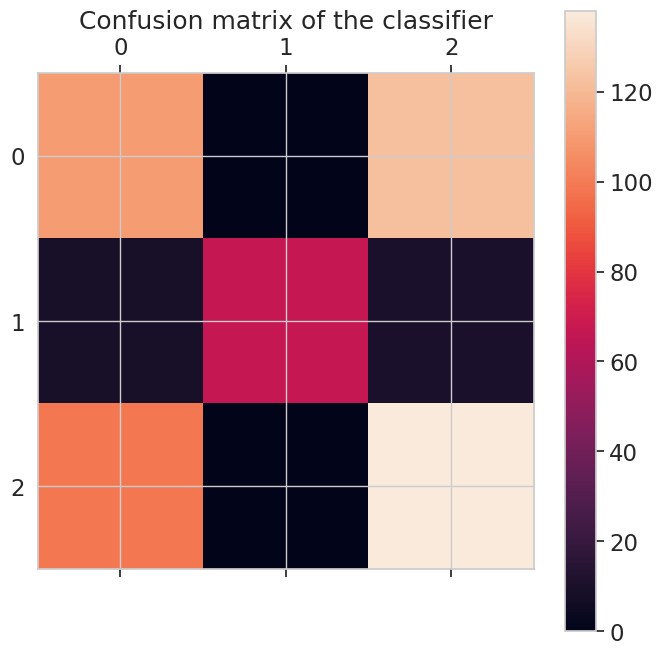

In [93]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [94]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

     Airport       0.50      0.47      0.49       232
    Domestic       1.00      0.78      0.88        86
    Returnee       0.51      0.58      0.54       237

    accuracy                           0.57       555
   macro avg       0.67      0.61      0.64       555
weighted avg       0.58      0.57      0.57       555

